In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [3]:
train_dir = "../artifacts/data_ingestion/img_align_celeba/"

In [4]:
%pwd

'/teamspace/studios/this_studio/DeepLearning/DenoisingFaceUsing_AutoEncoders/research'

In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (218, 178, 3)


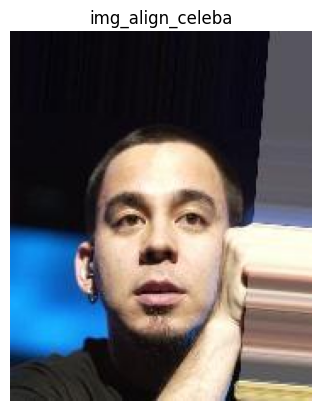

In [6]:
img = view_random_image(target_dir=train_dir,
                        target_class="img_align_celeba")

In [7]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [8]:
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size = (207,175),
    seed=42,
    shuffle=True,
)

Found 202599 images belonging to 1 classes.


In [9]:
train_data.batch_size

32

In [10]:
import numpy as np

def add_noise(image, noise_type="gaussian", mean=0, var=0.01, salt_vs_pepper=0.5, amount=0.004):
    """
    Adds noise to an RGB image.

    Parameters:
    - image: Input image (H, W, C) as a NumPy array.
    - noise_type: Type of noise - "gaussian", "salt_and_pepper", "speckle".
    - mean: Mean for Gaussian noise.
    - var: Variance for Gaussian noise.
    - salt_vs_pepper: Proportion of salt vs. pepper noise (only for salt and pepper noise).
    - amount: Proportion of pixels affected by noise (only for salt and pepper noise).

    Returns:
    - Noisy image as a NumPy array.
    """
    amount =0.004+np.random.rand()*(0.05)
    # Convert the image to float32 for precision
    image = np.array(image, dtype=np.float32)
    
    if noise_type == "gaussian":
        row, col, ch = image.shape
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        noisy = image + gauss * 255  # Multiply by 255 to scale to image intensity
        noisy = np.clip(noisy, 0, 255)  # Clip to valid range
        return noisy.astype(np.uint8)
    
    elif noise_type == "salt_and_pepper":
        row, col, ch = image.shape
        s_vs_p = salt_vs_pepper
        out = np.copy(image)
        
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords[0], coords[1], :] = 255
        
        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords[0], coords[1], :] = 0
        
        return out.astype(np.uint8)
    
    elif noise_type == "speckle":
        row, col, ch = image.shape
        gauss = np.random.randn(row, col, ch)
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0, 255)  # Clip to valid range
        return noisy.astype(np.uint8)
    
    else:
        raise ValueError("Invalid noise type. Choose 'gaussian', 'salt_and_pepper', or 'speckle'.")

# Example usage:
# Load an image using OpenCV (or any other library)

# Apply Gaussian noise
# noisy_image_gaussian = add_noise(image, noise_type="gaussian", mean=0, var=0.01)

# # Apply Salt and Pepper noise
# noisy_image_salt_pepper = add_noise(image, noise_type="salt_and_pepper", salt_vs_pepper=0.5, amount=0.004)

# # Apply Speckle noise
# noisy_image_speckle = add_noise(image, noise_type="speckle")


In [11]:
np.round(1+np.random.rand()*(5-1))

5.0

In [12]:
np.random.choice(["hlo","hdhg"])

'hdhg'

In [ ]:
train_x = []
noisy_data = []
c = 1
for batch in train_data:
    data,labels = batch
    data = np.array(data,dtype="uint8")
    if c<2000:
        pass
    if c%100==0:
        print(f"batch: {c} lenis: {len(train_x)}")
        plt.imshow(noisy_data[-1])
        break
    c+=1
    for i in range(len(data)):
    # Randomly choose the noise type
        noise_type = random.choice(["gaussian", "salt_and_pepper", "speckle"])
        
        # Randomly choose parameters for each noise type
        if noise_type == "gaussian":
            mean = random.uniform(-0.1, 0.1)  # Random mean between -0.1 and 0.1
            var = random.uniform(0.001, 0.1)  # Random variance between 0.001 and 0.1
            noisy_image = add_noise(data[i], noise_type="gaussian", mean=mean, var=var)
        
        elif noise_type == "salt_and_pepper":
            salt_vs_pepper = random.uniform(0.2, 0.8)  # Ratio of salt to pepper
            amount = random.uniform(0.001, 0.01)  # Proportion of affected pixels
            noisy_image = add_noise(data[i], noise_type="salt_and_pepper", salt_vs_pepper=salt_vs_pepper, amount=amount)
        
        elif noise_type == "speckle":
            noisy_image = add_noise(data[i], noise_type="speckle")
        train_x.append(data[i])
        # Append the noisy image to the list
        noisy_data.append(noisy_image)

batch: 100 lenis: 3168


In [ ]:
len(train_x)

In [ ]:
noisy_data[0]

In [ ]:
np.save("test_org",np.array(train_x))
np.save("test_noise",np.array(noisy_data))

In [ ]:
train_x[0].shape,noisy_data[0]

In [ ]:
len(train_x),len(noisy_data)